# Lead in Guiyu Air vs. Control Areas

This notebook creates a chart based on Lead (Pb) particle concentration in Guiyu China in comparison with other areas.

This notebook is based on:

[1] W. J. Deng, P. K. K. Louie, W. K. Liu, X. H. Bi, J. M. Fu, and M. H. Wong, “Atmospheric levels and cytotoxicity of PAHs and heavy metals in TSP and PM2.5 at an electronic waste recycling site in southeast China,” Atmospheric Environment, vol. 40, no. 36, pp. 6945–6955, Nov. 2006, doi: 10.1016/j.atmosenv.2006.06.032.

[2] World Health Organization, Ed., Air quality guidelines for Europe, 2nd ed. in WHO regional publications, no. no. 91. Copenhagen: World Health Organization, Regional Office for Europe, 2000.

[3] F. Var, Y. Narita, and S. Tanaka, “The concentration, trend and seasonal variation of metals in the atmosphere in 16 Japanese cities shown by the results of National Air Surveillance Network (NASN) from 1974 to 1996,” Atmospheric Environment, vol. 34, no. 17, pp. 2755–2770, Jan. 2000, doi: 10.1016/S1352-2310(99)00353-2.

[4] K.-H. Kim et al., “The chemical composition of fine and coarse particles in relation with the Asian Dust events,” Atmospheric Environment, vol. 37, no. 6, pp. 753–765, Feb. 2003, doi: 10.1016/S1352-2310(02)00954-8.

[5] KostisPar, “Answer to ‘Pandas plot bar without NaN values spaces,’” Stack Overflow. Accessed: Jun. 08, 2024. [Online]. Available: https://stackoverflow.com/a/70019779

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
locations = ("Guiyu", "Non-urban Areas", "Tokyo", "Seoul")

# Guiyu data from [1].  Non-urban data from [2]. Tokyo data from [3]. Seoul data from [4].
data = {
    "TSP": [444, np.nan, 124.7, np.nan],
    "PM": [392, np.nan, np.nan, 124],
    "Unspecified": [np.nan, 150, np.nan, np.nan]
}

df = pd.DataFrame(data, index=locations)
df

,TSP,PM,Unspecified
Guiyu,444.0,392.0,NaN
Non-urban Areas,NaN,NaN,150.0
Tokyo,124.7,NaN,NaN
Seoul,NaN,124.0,NaN


In [13]:
# Ensure proper types
df = df.astype({"TSP": float, "PM": float, "Unspecified": float})
df

,TSP,PM,Unspecified
Guiyu,444.0,392.0,NaN
Non-urban Areas,NaN,NaN,150.0
Tokyo,124.7,NaN,NaN
Seoul,NaN,124.0,NaN


In [14]:
# Reset index
df = df.reset_index()
df

,index,TSP,PM,Unspecified
0,Guiyu,444.0,392.0,NaN
1,Non-urban Areas,NaN,NaN,150.0
2,Tokyo,124.7,NaN,NaN
3,Seoul,NaN,124.0,NaN


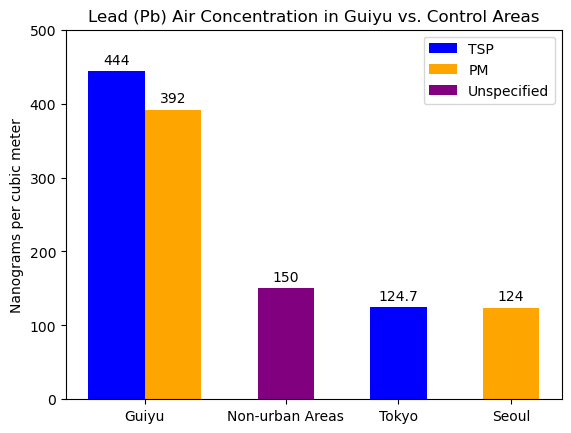

In [15]:
# This design based on [5].

width = 1
multiplier = 0

# Create empty lists for x tick positions and names
x_ticks, x_tick_pos = [], []

# Define colors for each column
colors = {'TSP': 'blue', 'PM': 'orange', 'Unspecified': 'purple'}

# Go through each row in the df
for idx, row in df.iterrows():
    multiplier += 1
    
    start_idx = multiplier - width / 2
    
    end_idx = start_idx
    
    for col in df.drop("index", axis=1).columns:
        if row[col] == row[col]:
            cont = plt.bar(multiplier, row[col], color=colors[col], width=width, label=col)
            multiplier += 1
            end_idx += width
            plt.bar_label(cont, padding=3)  # Add value to the bar
            
    if end_idx != start_idx:
        x_tick_pos.append((start_idx + end_idx) / 2)
        x_ticks.append(row["index"])

# Handle chart metadata
plt.xticks(x_tick_pos, x_ticks)
plt.ylabel("Nanograms per cubic meter")
plt.title("Lead (Pb) Air Concentration in Guiyu vs. Control Areas")
plt.ylim(0, 500)

# Handle legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Save the resulting plot
plt.savefig("images/lead_china.png")